# Modules and data import

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
metadata_df = pd.read_csv("data/network_metadata.tab", sep="\t")
metadata_df.loc[:, "IMDB_id"] = metadata_df["IMDB_id"].str[2:].astype('int')
metadata_df.head()

,GexfID,Title,IMDB_id,ReleaseDate,Slug,WeightedDegree,Modularity,PathLength,Diameter,ClusteringCoefficient,ConnectedComponents,Density,Edges,Characters
0,1,10 Things I Hate About You,147800,1999,10-Things-I-Hate-About-You,"13,040","0,194","1,779","3,000","0,567","3,000","0,233",225,25
1,2,12,488478,2007,12,"4,227","0,517","2,170","3,000","0,610","6,000","0,077",102,42
2,3,Twelve and Holding,417385,2005,Twelve-and-Holding,"7,333","0,473","2,449","4,000","0,593","2,000","0,140",139,26
3,5,127 Hours,1542344,2010,127-Hours,"3,833","0,160","1,722","2,000","0,339","4,000","0,152",33,11
4,6,1492: Conquest of Paradise,103594,1992,1492:-Conquest-of-Paradise,"7,941","0,350","2,043","4,000","0,705","1,000","0,153",164,34


In [24]:
imdb_data_df = pd.read_json("data/gexf_imdb_metadata.json", orient='index')
imdb_data_df

,box_office,character_actor_mapping,directors,genres,imdb_rating,imdb_votes,movie_id,runtime_min,writers
1,"{'Budget': '$30,000,000 (estimated)', 'Opening...",{'Bartender': {'BARTENDER': 'Carlos Lacamara'}...,[Gil Junger],"[Comedy, Drama, Romance]",7.3,279031.0,147800,97.0,"[Karen McCullah, Kirsten Smith, William Shakes..."
10,"{'Budget': '$12,000,000 (estimated)', 'Opening...",{'Poole's Father': {'FATHER': 'Alan Gifford'}},[Stanley Kubrick],"[Adventure, Sci-Fi]",8.3,565235.0,62622,149.0,"[Stanley Kubrick, Arthur C. Clarke, Arthur C. ..."
100,"{'Budget': '$20,000,000 (estimated)', 'Opening...","{'Chief of Police': {'CHIEF': 'Gary Grubbs'}, ...",[Werner Herzog],"[Crime, Drama]",6.6,72110.0,1095217,122.0,[William M. Finkelstein]
101,"{'Budget': '$23,000,000 (estimated)', 'Opening...",{'Milwaukee Mom with Photo': {'MOM': 'Alex Bor...,[Terry Zwigoff],"[Comedy, Crime, Drama]",7.0,130245.0,307987,92.0,"[Glenn Ficarra, John Requa]"
102,"{'Budget': '$450,000 (estimated)'}",{'Father': {'FATHER': 'Warren Oates'}},[Terrence Malick],"[Crime, Drama]",7.8,60849.0,69762,94.0,[Terrence Malick]
...,...,...,...,...,...,...,...,...,...
92,"{'Budget': '$25,000,000 (estimated)', 'Cumulat...","{'Doctor - Vet': {'DOC': 'Hammou Aghrar'}, 'Re...",[Alejandro G. Iñárritu],[Drama],7.4,278779.0,449467,143.0,"[Guillermo Arriaga, Guillermo Arriaga, Alejand..."
93,"{'Budget': '$5,000,000 (estimated)', 'Opening ...",{'Father O'Donall': {'FATHER': 'Hugh McPhillip...,[Neal Israel],[Comedy],6.3,33885.0,86927,105.0,"[Bob Israel, Neal Israel, Pat Proft]"
97,"{'Budget': '$40,000,000 (estimated)', 'Opening...",{'Chief John Fitzgerald': {'CHIEF': 'Anthony M...,[Ron Howard],"[Crime, Drama, Mystery, Thriller]",6.7,68080.0,101393,137.0,[Gregory Widen]
98,"{'Budget': '$19,000,000 (estimated)', 'Opening...",{'Club Bartender': {'BARTENDER': 'Jimmy Franzo...,[Michael Bay],"[Action, Comedy, Crime, Thriller]",6.9,220505.0,112442,119.0,"[George Gallo, Michael Barrie, Jim Mulholland,..."


In [30]:
df = pd.merge(metadata_df, imdb_data_df, left_on="IMDB_id", right_on="movie_id")
df

,GexfID,Title,IMDB_id,ReleaseDate,Slug,WeightedDegree,Modularity,PathLength,Diameter,ClusteringCoefficient,...,Characters,box_office,character_actor_mapping,directors,genres,imdb_rating,imdb_votes,movie_id,runtime_min,writers
0,1,10 Things I Hate About You,147800,1999,10-Things-I-Hate-About-You,"13,040","0,194","1,779","3,000","0,567",...,25,"{'Budget': '$30,000,000 (estimated)', 'Opening...",{'Bartender': {'BARTENDER': 'Carlos Lacamara'}...,[Gil Junger],"[Comedy, Drama, Romance]",7.3,279031.0,147800,97.0,"[Karen McCullah, Kirsten Smith, William Shakes..."
1,2,12,488478,2007,12,"4,227","0,517","2,170","3,000","0,610",...,42,"{'Budget': '$4,000,000 (estimated)', 'Opening ...",{'Dochka svidetelya': {'DOC': 'Lyubov Rudneva'}},[Nikita Mikhalkov],"[Crime, Drama, Thriller]",7.7,13437.0,488478,159.0,"[Nikita Mikhalkov, Aleksandr Novototskiy-Vlaso..."
2,3,Twelve and Holding,417385,2005,Twelve-and-Holding,"7,333","0,473","2,449","4,000","0,593",...,26,"{'Budget': '$400,000 (estimated)', 'Opening We...","{'Priest': {'PRIEST': 'Robertson Carricart'}, ...",[Michael Cuesta],[Drama],7.5,6550.0,417385,94.0,[Anthony Cipriano]
3,5,127 Hours,1542344,2010,127-Hours,"3,833","0,160","1,722","2,000","0,339",...,11,"{'Budget': '$18,000,000 (estimated)', 'Opening...","{'Aron's Mom': {'MOM': 'Kate Burton'}, 'Report...",[Danny Boyle],"[Biography, Drama]",7.6,333048.0,1542344,94.0,"[Danny Boyle, Simon Beaufoy, Aron Ralston]"
4,6,1492: Conquest of Paradise,103594,1992,1492:-Conquest-of-Paradise,"7,941","0,350","2,043","4,000","0,705",...,34,"{'Budget': '$47,000,000 (estimated)', 'Cumulat...",{},[Ridley Scott],"[Adventure, Biography, Drama, History]",6.5,26854.0,103594,154.0,[Rose Bosch]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,910,Yes Man,1068680,2008,Yes-Man,"9,143","0,351","1,899","2,000","0,729",...,51,"{'Budget': '$70,000,000 (estimated)', 'Opening...",{'Father at Homeless Shelter': {'FATHER': 'Mik...,[Peyton Reed],"[Comedy, Romance]",6.8,319225.0,1068680,104.0,"[Nicholas Stoller, Jarrad Paul, Andrew Mogel, ..."
769,911,You Can Count on Me,203230,2000,You-Can-Count-on-Me,"11,400","0,275","1,752","3,000","0,583",...,18,"{'Budget': '$1,200,000 (estimated)', 'Opening ...",{},[Kenneth Lonergan],[Drama],7.5,26652.0,203230,111.0,[Kenneth Lonergan]
770,912,You've Got Mail,128853,1998,You've-Got-Mail,"8,769","0,374","2,131","4,000","0,727",...,36,"{'Budget': '$65,000,000 (estimated)', 'Opening...",{'T.V. Reporter': {'REPORTER': 'Nina Zoie Lam'}},[Nora Ephron],"[Comedy, Drama, Romance]",6.6,183169.0,128853,119.0,"[Miklós László, Nora Ephron, Delia Ephron]"
771,913,Youth in Revolt,403702,2009,Youth-in-Revolt,"11,000","0,287","1,916","4,000","0,640",...,34,"{'Budget': '$18,000,000 (estimated)', 'Opening...",{},[Miguel Arteta],"[Comedy, Drama, Romance]",6.4,71077.0,403702,90.0,"[Gustin Nash, C.D. Payne]"


# Exploring Graph connections

## How are genres related?
A graphical representation of genres and how they're connected.
Connections between genres are based on movie genres (i.e. given 2 movies that have genres `['Action', 'Thriller']` and `['Action', 'Comedy']`, we deduce an edge `Action -> Thriller` and `Action -> Comedy`, each with a weight of 1.
These are aggregated across all movies.

In [184]:
G = nx.Graph()
genres = df["genres"].values
unique_generes = np.unique([g for genres in genres for g in genres])
for g in unique_generes: # Add the nodes
    G.add_node(g)
    

count = dict()  # Aggregate the counts here
for g in unique_generes:
    if g not in count:
        count[g] = dict()
    for i in range(genres.shape[0]):
        for g2 in genres[i]:
            if g == g2:
                continue
            if g2 not in count[g]:
                count[g][g2] = 0
            count[g][g2] += 1

for u, d in count.items():
    for v, w in d.items():
        if u != v:
            G.add_edge(u, v, weight=w)

In [202]:
def draw_connection_with_edges(G, min_weight=None, max_weight=None, figsize=None, layout=None,
                               c=100, font_size=16, font_color='orange'):
    if figsize is not None:
        plt.figure(figsize=figsize)
        
    pos = layout or nx.random_layout(G)
    weights = {(u, v): d["weight"] for (u, v, d) in G.edges(data=True)}
    if min_weight is not None:
        weights = {k: v for k, v in weights.items() if v > min_weight}
    if max_weight is not None:
        weights = {k: v for k, v in weights.items() if v <= max_weight}
    filtered_edges = list(weights.keys())
    
    t = np.array(list(weights.values()))
    normalized_weights = c*t/t.sum()

    nx.draw(G, pos=pos, edgelist=filtered_edges, font_color=font_color, width=normalized_weights,
            with_labels=True, font_weight='bold', font_size=font_size)

    nx.draw_networkx_edge_labels(G,
                                 pos=pos,
                                 edge_labels=weights)
    plt.show()

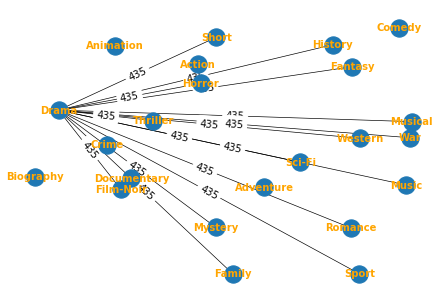

In [204]:
draw_connection_with_edges(G, min_weight=300, c=10, font_size=10)

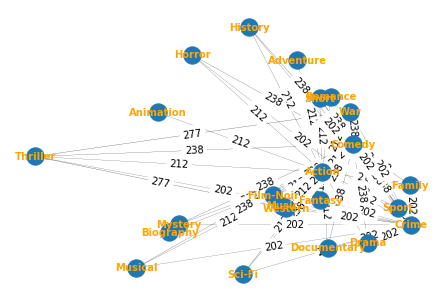

In [205]:
draw_connection_with_edges(G, min_weight=200, max_weight=300, c=10, font_size=10)

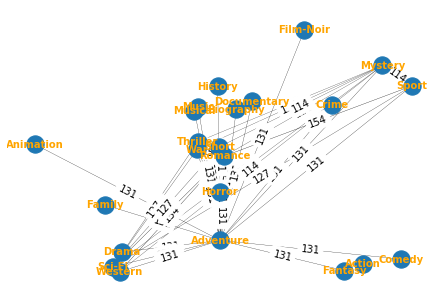

In [206]:
draw_connection_with_edges(G, min_weight=100, max_weight=200, c=10, font_size=10)

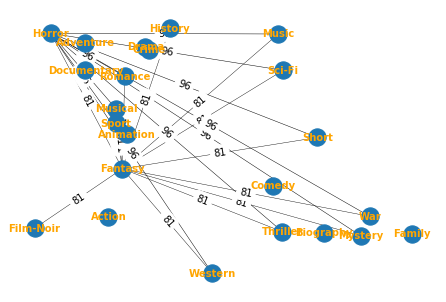

In [208]:
draw_connection_with_edges(G, min_weight=50, max_weight=100, c=10, font_size=10)

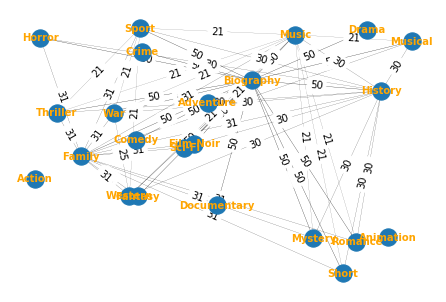

In [209]:
draw_connection_with_edges(G, min_weight=20, max_weight=50, c=10, font_size=10)

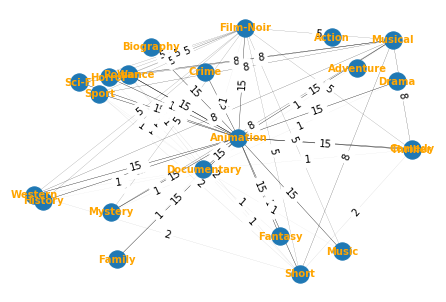

In [210]:
draw_connection_with_edges(G, max_weight=20, c=10, font_size=10)

## Finding main characters
(WIP) - mainly experimenting with NetworkX algorithms and how can they be of service for us

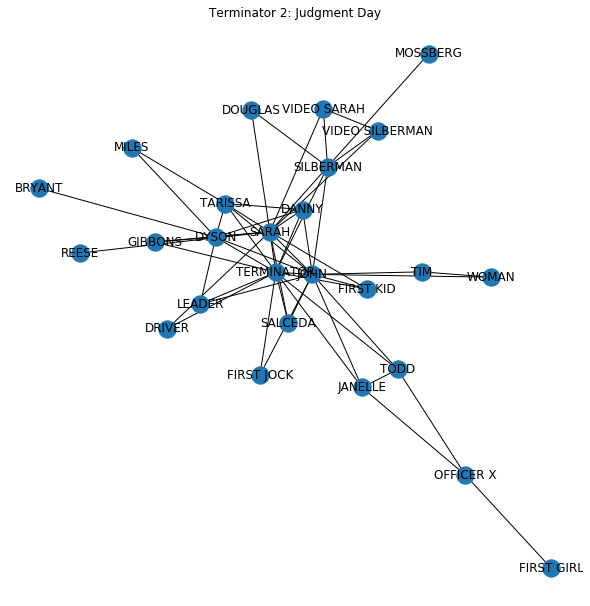

In [370]:
%matplotlib inline
# random_row = df.sample(1)
random_row = df[df["Title"].str.contains("Judgment")]
# random_row = df[df["Title"].str.contains("Titanic")]
# random_row = df[df["Title"].str.contains("Silent")]
random_graph = nx.read_gexf("data/gexf/{}.gexf".format(random_row["GexfID"].values[0]), relabel=True)
plt.figure(figsize=(8, 8))
nx.draw_spring(random_graph, with_labels=True)
plt.title(random_row["Title"].values[0])
plt.show()

In [371]:
from tabulate import tabulate
print(tabulate(random_graph.degree, tablefmt='pipe'))

|:----------------|---:|
| BRYANT          |  1 |
| DANNY           |  5 |
| DOUGLAS         |  2 |
| DRIVER          |  2 |
| DYSON           |  9 |
| FIRST GIRL      |  1 |
| FIRST JOCK      |  2 |
| FIRST KID       |  3 |
| GIBBONS         |  3 |
| JANELLE         |  4 |
| JOHN            | 14 |
| LEADER          |  3 |
| MILES           |  2 |
| MOSSBERG        |  1 |
| OFFICER X       |  3 |
| REESE           |  1 |
| SALCEDA         |  3 |
| SARAH           | 14 |
| SILBERMAN       |  7 |
| TARISSA         |  6 |
| TERMINATOR      | 14 |
| TIM             |  2 |
| TODD            |  4 |
| VIDEO SARAH     |  3 |
| VIDEO SILBERMAN |  3 |
| WOMAN           |  2 |


In [270]:
df[["Kevin Smith" in w for w in df["writers"]]]

,GexfID,Title,IMDB_id,ReleaseDate,Slug,WeightedDegree,Modularity,PathLength,Diameter,ClusteringCoefficient,...,Characters,box_office,character_actor_mapping,directors,genres,imdb_rating,imdb_votes,movie_id,runtime_min,writers
169,200,Clerks.,109445,1994,Clerks.,"8,154","0,370","2,043","3,000","0,770",...,35,"{'Budget': '$27,575 (estimated)', 'Opening Wee...",{''Happy Scrappy' Mom': {'MOM': 'Connie O'Conn...,[Kevin Smith],[Comedy],7.7,205613.0,109445,92.0,[Kevin Smith]
386,452,Jay and Silent Bob Strike Back,261392,2001,Jay-and-Silent-Bob-Strike-Back,"9,942","0,443","2,020","3,000","0,772",...,63,"{'Budget': '$22,000,000 (estimated)', 'Opening...",{'Background Dancer': {'DANCER': 'Brandon J. M...,[Kevin Smith],[Comedy],6.8,144521.0,261392,104.0,"[Kevin Smith, Kevin Smith]"


In [372]:
{n: dc for n, dc in nx.degree_centrality(random_graph).items() if dc >= 0.5}

{'JOHN': 0.56, 'SARAH': 0.56, 'TERMINATOR': 0.56}

In [373]:
{n: cc for n, cc in nx.closeness_centrality(random_graph).items() if cc >= 0.5}

{'DANNY': 0.5102040816326531,
 'DYSON': 0.5555555555555556,
 'JOHN': 0.6756756756756757,
 'SARAH': 0.6410256410256411,
 'SILBERMAN': 0.5208333333333334,
 'TARISSA': 0.5208333333333334,
 'TERMINATOR': 0.6756756756756757}

In [378]:
# cores = nx.core_number(random_graph)
# m = np.mean(list(cores.values()))
# {k: v for k, v in cores.items() if v >= m}
ol = nx.onion_layers(random_graph)
u = max(list(ol.values()))-1
{k: v for k, v in ol.items() if v >= u}

{'SILBERMAN': 4,
 'DANNY': 5,
 'DYSON': 5,
 'JOHN': 5,
 'SARAH': 5,
 'TARISSA': 5,
 'TERMINATOR': 5}

In [346]:
{n: bc for n, bc in nx.betweenness_centrality(random_graph).items() if bc >= 0.1}

{'JACK': 0.21846848051998502, 'ROSE': 0.38293118370973894}

In [347]:
list(nx.bridges(random_graph))

[('ANDREWS', 'SEAMAN'), ('CREWMAN', 'LOVEJOY'), ('OPERATOR', 'ROSE')]

In [348]:
list(nx.find_cliques(random_graph))

[['STEWARD #2', 'LITTLE BOY', 'WOMAN', 'STEWARD'],
 ['STEWARD #2', 'JACK', 'TOMMY', 'FABRIZIO'],
 ['STEWARD #2', 'JACK', 'STEWARD', 'WOMAN'],
 ['MURDOCH', 'TOMMY', 'CAL'],
 ['MURDOCH', 'LOVEJOY', 'ANDREWS', 'CAL'],
 ['MURDOCH', 'MOLLY', 'BARRETT', 'MOODY', 'LEE', 'FLEET', 'BELL'],
 ['MURDOCH', 'MOLLY', 'CAL', 'ISMAY', 'ANDREWS'],
 ['MURDOCH', 'MOLLY', 'ISMAY', 'ANDREWS', 'SMITH'],
 ['MOODY', 'FLEET', 'JACK', 'LEE', 'MOLLY'],
 ['MOODY', 'ROWE', 'JACK'],
 ['ANNOUNCER', 'LOVETT', 'BUELL'],
 ['HARTLEY', 'RUTH', 'LIGHTOLLER', 'CAL', 'WOMAN IN CROWD'],
 ['FIRST OFFICER MURDOCH', 'SMITH', 'FABRIZIO', 'ISMAY'],
 ['FIRST OFFICER MURDOCH', 'SMITH', 'LIGHTOLLER', 'BRIDE'],
 ['CAMERAMAN', 'LOVETT', 'BODINE'],
 ['MOTHER', 'JACK', 'FATHER BYLES'],
 ['PUBKEEPER', 'FABRIZIO', 'OLAF', 'JACK', 'SVEN'],
 ['HITCHINS', 'MOLLY', 'SIR COSMO'],
 ['HITCHINS', 'MOLLY', 'SMITH'],
 ['IDA', 'LOVEJOY', 'ANDREWS', 'LIGHTOLLER', 'CAL', 'WOMAN'],
 ['CREWMAN', 'LOVEJOY'],
 ['ROSE', 'PORTER', 'OLD ROSE', 'RUTH', 'MAN', 

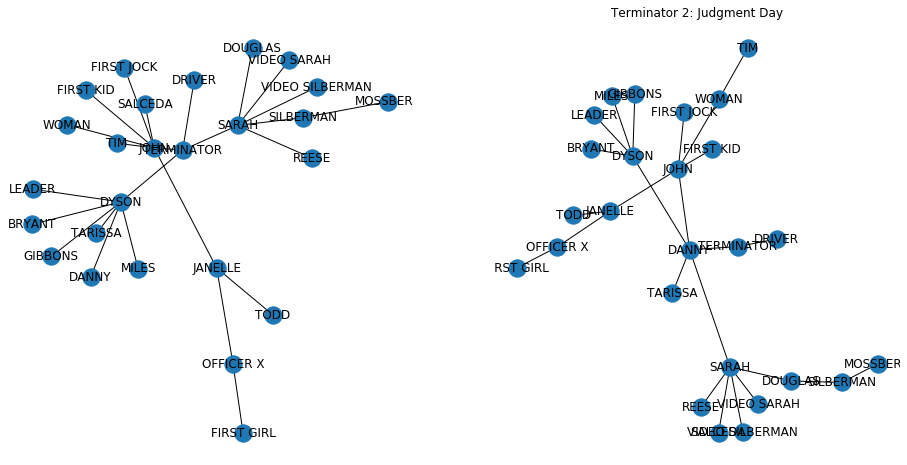

In [312]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
nx.draw_spring(nx.maximum_spanning_tree(random_graph), with_labels=True)
plt.subplot(122)
nx.draw_spring(nx.minimum_spanning_tree(random_graph), with_labels=True)
plt.title(random_row["Title"].values[0])
plt.show()

In [322]:
for color, actors_list in pd.DataFrame(nx.greedy_color(random_graph).items(), columns=["character", "color_index"]).groupby("color_index"):
    print(color, actors_list, "\n")

0       character  color_index
0          JOHN            0
10      GIBBONS            0
12    OFFICER X            0
14  VIDEO SARAH            0
16      DOUGLAS            0
17       DRIVER            0
19        MILES            0
22       BRYANT            0
24     MOSSBERG            0
25        REESE            0 

1      character  color_index
1        SARAH            1
7      JANELLE            1
11      LEADER            1
18  FIRST JOCK            1
20         TIM            1
23  FIRST GIRL            1 

2           character  color_index
2        TERMINATOR            2
15  VIDEO SILBERMAN            2
21            WOMAN            2 

3     character  color_index
3       DYSON            3
4   SILBERMAN            3
8        TODD            3
9   FIRST KID            3
13    SALCEDA            3 

4   character  color_index
5   TARISSA            4 

5   character  color_index
6     DANNY            5 



In [325]:
list(nx.community.girvan_newman(random_graph))[3]

({'BRYANT'},
 {'DANNY',
  'DRIVER',
  'DYSON',
  'FIRST JOCK',
  'FIRST KID',
  'GIBBONS',
  'JANELLE',
  'JOHN',
  'LEADER',
  'MILES',
  'OFFICER X',
  'SALCEDA',
  'SARAH',
  'TARISSA',
  'TERMINATOR',
  'TIM',
  'TODD',
  'WOMAN'},
 {'DOUGLAS', 'MOSSBERG', 'SILBERMAN', 'VIDEO SARAH', 'VIDEO SILBERMAN'},
 {'FIRST GIRL'},
 {'REESE'})